In [1]:
# import dependencies
import numpy as np
import pandas as pd

# import core dependencies
from symlearn.core.parameters import Parameters
from symlearn.core.functions import *
from symlearn.core.errors import *


In [2]:
# suppress numpy warnings
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
# import dataset
data = pd.read_csv('example/data.csv').to_numpy()
X = data[:, [0, 1]]
y = data[:, 2]
t = np.arange(0, 290)
# split each of training and test subsets into inputs (X) and outputs (Y)
X_train = X[0:201, :]
X_test = X[200:, :]
y_train = y[0:201]
y_test = y[200:]
t_train = t[:201]
t_test = t[200:]

In [5]:
# set global parameters
Parameters.CONSTANTS = [-5, 5]
Parameters.FEATURES = X_train.shape[1]
Parameters.CONSTANTS_TYPE = 'range'
expressions = [Add, Sub, Mul, Div, Sin, Cos]
terminals = [Variable, Constant]

In [6]:
# import model
from symlearn.models import FFP
model = FFP(pop_size=50,
        max_evaluations=5000,
        initial_min_depth=0,
        initial_max_depth=6,
        min_depth=1,
        max_depth=15,
        error_function=r2_score_inverse,
        expressions=expressions,
        terminals=terminals,
        target_error=0,
        verbose=False
        )

In [7]:
# fit data into model
model.fit(X_train, y_train)
y_fit = model.predict(X_train)
y_pred = model.predict(X_test)

In [9]:
# print results of the model
train_score = r2_score(y_train, y_fit)
test_score = r2_score(y_test, y_pred)
print(f'Training set r2 score: {train_score}\nTest set r2 score: {test_score}')


Training set r2 score: 0.9585678191751174
Test set r2 score: 0.8990348045954116


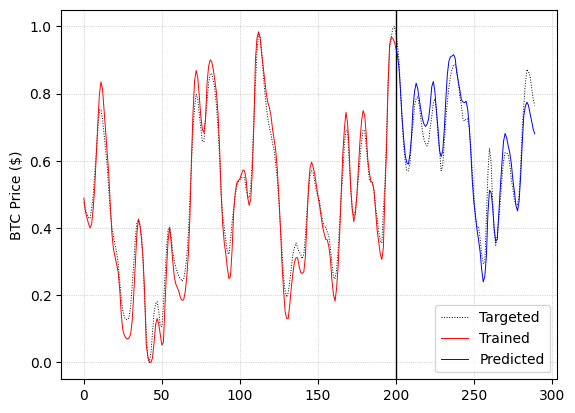

In [10]:
# plotting graphs
import matplotlib.pyplot as plt
ax = plt.axes()
ax.grid(linestyle=':', linewidth=0.5, alpha=1, zorder=1)
plt.ylabel("BTC Price ($)")
line = [None, None, None, None]
line[0], = ax.plot(t_train, y_train, linestyle=':', color='black', linewidth=0.7, zorder=2, label='Targeted')    
line[1], = ax.plot(t_train, y_fit, linestyle='-', color='red', linewidth=0.7, zorder=3, label='Trained')
line[2], = ax.plot(t_test, y_test, linestyle=':', color='black', linewidth=0.7, zorder=2)
line[3], = ax.plot(t_test, y_pred, linestyle='-', color='blue', linewidth=0.7, zorder=3, label='Predicted')
plt.axvline(x=t_test[0], linestyle='-', color='black', linewidth='1')
plt.draw()
plt.legend()
plt.show()

In [ ]:
# export the best model's graph
model.export_best()